In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [38]:
accidents2016 = pd.read_csv("data/CRSS2016CSV/ACCIDENT.csv")
accidents2017 = pd.read_csv("data/CRSS2017CSV/ACCIDENT.csv")
accidents = accidents2016.append(accidents2017, sort=False)

In [39]:
vehicles2016 = pd.read_csv("data/CRSS2016CSV/VEHICLE.csv", low_memory=False)
vehicles2017 = pd.read_csv("data/CRSS2017CSV/VEHICLE.csv", low_memory=False)
vehicles = vehicles2016.append(vehicles2017, sort=False)

In [40]:
persons2016 = pd.read_csv("data/CRSS2016CSV/PERSON.csv")
persons2017 = pd.read_csv("data/CRSS2017CSV/PERSON.csv")
persons = persons2016.append(persons2017, sort=False)

In [41]:
vindecode2016 = pd.read_csv("data/CRSS2016CSV/VINDECODE.csv", low_memory=False)
vindecode2017 = pd.read_csv("data/CRSS2017CSV/VINDECODE.csv", low_memory=False)
vindecode = vindecode2016.append(vindecode2017, sort=False)

In [42]:
overlaping_columns = ['CASENUM', 'REGION', 'PSU', 'PJ', 'PSU_VAR', 'URBANICITY', 'STRATUM', 'VE_FORMS',
                      'MONTH', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL', 'SCH_BUS', 'PSUSTRAT',
                      'WEIGHT']
df = accidents.merge(persons,  on=overlaping_columns, suffixes=(False, False))

In [43]:
overlaping_columns = ['CASENUM', 'VEH_NO', 'REGION', 'PSU', 'PJ', 'PSU_VAR', 'URBANICITY', 'STRATUM', 'VE_FORMS',
       'MONTH', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL', 'PSUSTRAT', 'WEIGHT',
       'MAKE', 'BODY_TYP', 'MOD_YEAR', 'MAK_MOD', 'TOW_VEH', 'SPEC_USE',
       'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP']
df = df.merge(vehicles, on= overlaping_columns,suffixes=(False, False))

In [44]:
overlaping_columns = ['CASENUM', 'VEH_NO', 'VIN']
df = df.merge(vindecode, on=overlaping_columns, suffixes=(False, False), how = 'inner')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221794 entries, 0 to 221793
Columns: 258 entries, CASENUM to FLAG
dtypes: float64(32), int64(141), object(85)
memory usage: 438.3+ MB


In [46]:
severety = {0: '0 - No Apparent Injury', 1: '1 - Possible Injury', 
            2: '2 - Minor Injury', 3: '3 - Serious Injury', 4: '4 - Fatal',
            5: np.nan, 6: np.nan, 8: np.nan, 9: np.nan}

In [47]:
from pandas.api.types import CategoricalDtype
    
df.MAX_SEV = df.MAX_SEV.replace(severety)

In [68]:
df.MOD_YEAR.replace([9998,9999], np.nan, inplace = True)

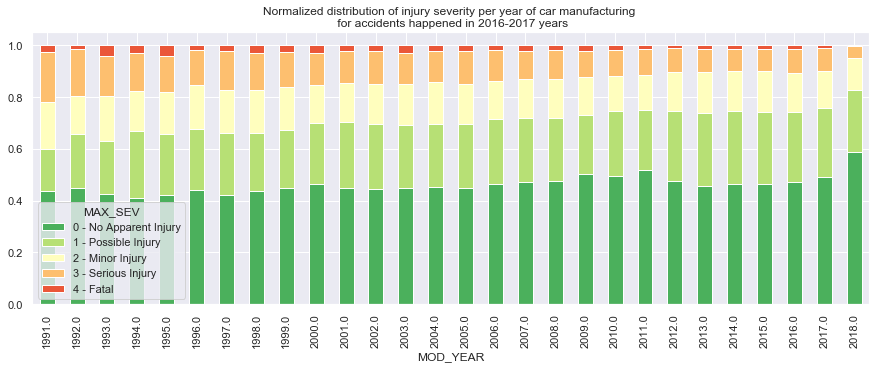

In [79]:
sns.set()

props = df[(df.MOD_YEAR > 1990)].groupby(
    "MOD_YEAR")['MAX_SEV'].value_counts(normalize=True).unstack()

props.plot(kind='bar', stacked=True,
           colormap=ListedColormap(sns.color_palette("RdYlGn_r", 5)),
           figsize=(15, 5))

plt.title('Normalized distribution of injury severity per year of car manufacturing \n for accidents happened in 2016-2017 years')
plt.show()

This plot shows normalized distribution of injury severity per year of car manufacturing for accidents happened in 2016-2017 years.
We can clearly see that modern cars provide much better protection for its riders, especially against severe and fatal insures. So the question of whether to upgrade the car is not only about convenience but also about safety. 

In [53]:
threshold = 300
vc = df['BODYSTYL_T'].value_counts()
vals_to_remove = vc[vc <= threshold].index.values
df['BODYSTYL_T'].loc[df['BODYSTYL_T'].isin(vals_to_remove)] = np.nan

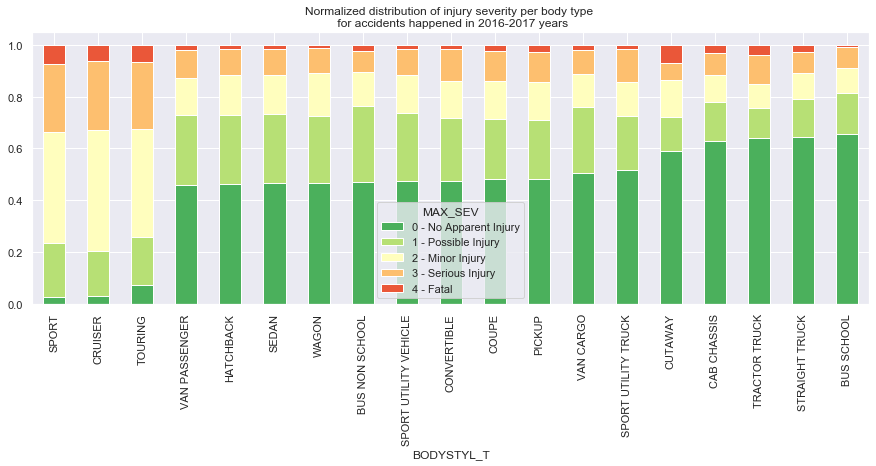

In [80]:
props = df.groupby('BODYSTYL_T')['MAX_SEV'].value_counts(
    normalize=True).unstack().sort_values(by='0 - No Apparent Injury')
props.plot(kind='bar', stacked=True,
           colormap=ListedColormap(sns.color_palette("RdYlGn_r", 5)),
           figsize=(15, 5))

plt.title('Normalized distribution of injury severity per body type \n for accidents happened in 2016-2017 years')
plt.show()

This plot shows the normalized distribution of injury severity per body type for accidents happened in 2016-2017 years. 
Different vehicle body types strongly impact the severity of the injury if a crash happened. 
For motorcycles, if crash happened, there is almost no chance not to receive any injury, while for any car your chances are about 45-70%.
Most safe is school buses, followed by straight trucks. Weight of the vehicle matters a lot!
The most popular car types - sedans and SUV shows very similar distributions, while I personally thought that SUV's are much safer. They are, but not that much. 
Cutaways show unusually large fatal rate. 

Coupes provide you with better protection against light injuries, but the fatal rate is worse. 


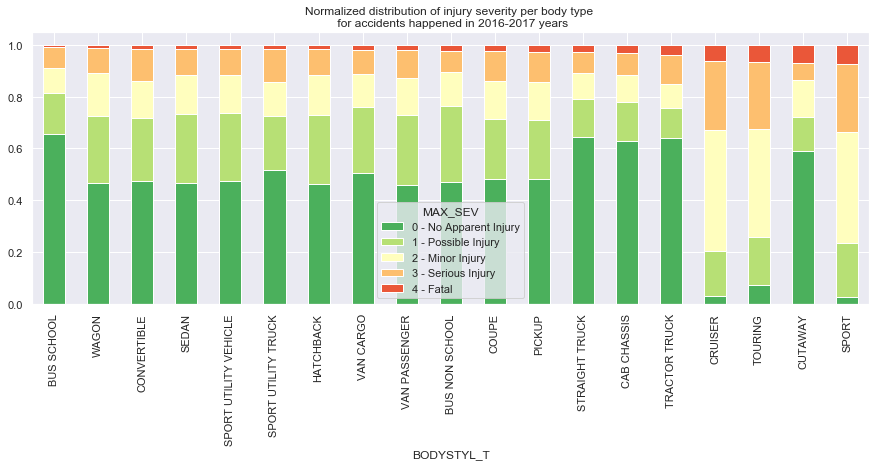

In [78]:
props = df.groupby('BODYSTYL_T')['MAX_SEV'].value_counts(
    normalize=True).unstack().sort_values(by='4 - Fatal')
props.plot(kind='bar', stacked=True,
           colormap=ListedColormap(sns.color_palette("RdYlGn_r", 5)),
           figsize=(15, 5))

plt.title('Normalized distribution of injury severity per body type \n for accidents happened in 2016-2017 years')
plt.show()